In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randint


#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

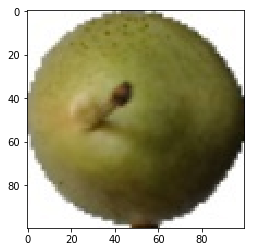

In [144]:
#read image
img = cv2.imread('../train/Pear/r_208_100.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [145]:
shape=img.shape
w=shape[1]
h=shape[0]

base_size=h+20,w+20,3
#make a 3 channel image for base which is slightly larger than target img
base=np.zeros(base_size,dtype=np.uint8)
cv2.rectangle(base,(0,0),(w+20,h+20),(255,255,255),30)#really thick white rectangle
base[10:h+10,10:w+10]=img #this works
img=base

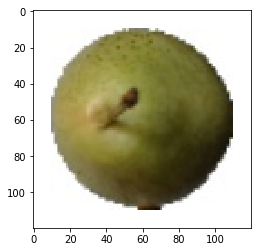

In [146]:
plt.imshow(img)

In [147]:
#converting image to graysclae to find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [148]:
#finding image edges and enhancing them
edged = cv2.Canny(gray, 50, 100)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
dilated = cv2.dilate(edged, kernel)

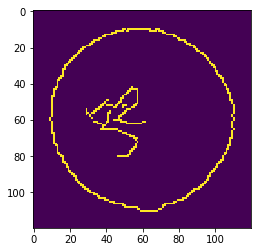

In [149]:
#show image with edges
plt.imshow(edged)

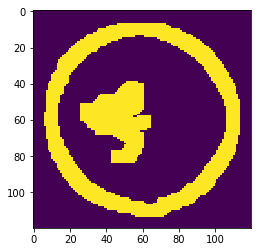

In [150]:
#show image with enhanced edges
plt.imshow(dilated)

In [151]:
#get enhanced image contours
_, cnts, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [152]:
mask = np.zeros_like(img)

In [153]:
#insert fruit area of original image onto a new image with black background

#creating new black image same size as the original
out = np.zeros_like(img)

#selecting all the pixels from mask that are white and replace them with those same 
#pixels from the original image (that correspond to the pixels of the fruit)
out[mask==255] = img[mask==255]

cv2.fillPoly(mask, pts =cnts, color=(255,255,255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

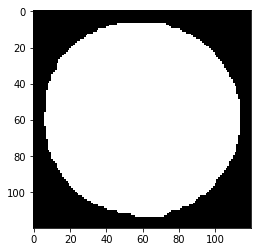

In [154]:
#show the mask we created
plt.imshow(mask)

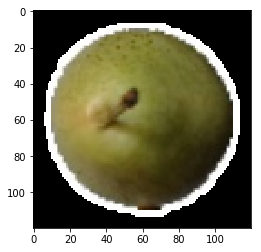

In [155]:
#put back all 3 color dimensions on the mask
img2 = img.copy()
mask[:,:,1] = mask[:,:,0]
mask[:,:,2] = mask[:,:,0]
img2[mask!=255] = 0
plt.imshow(img2)

In [156]:
#get all the rgb values for the mask
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]

In [157]:
#filter all the rgb values for the mask to eliminate the ones that are 0 (black)
r = r[r!=0]
g = g[g!=0]
b = b[b!=0]

In [158]:
#find color by calculating the mean of each color component
[int(r.mean()), int(g.mean()), int(b.mean())]

[132, 127, 81]